## Sports IQ Report
Report is split into 4 Parts <br>
* **Part 1**: Collect the data from NBA.stats (I used a python lib, nba_py for that purpose) <br>
* **Part 2**: Split Data into 4 parts <br>
    * First Half = QTR1 + QTR2 <br>
    * Second Half = QTR3+QTR4 + AnyOvertime <br>
    * Full Game = First Half + Second Half <br>
    * Regulation Time = QTR1 + QTR2 + QTR3 + QTR4 <br>
* **Part 3**: Split into Two parts <br>
    * Find Four Factors for Game <br>
    * Find Mean of Different QTRs and Facotors and difference from Mean of the Game <br>
* **Part 4**: Further Analysis from Data <br>


In [43]:
import pandas as pd
from nba_py import team
from nba_py import game
from nba_py import Scoreboard
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [37]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.layouts import column
output_notebook()

Loading BokehJS ...

## Part 1- Data Wrangling

1) Downloading data from NBA.stats for the season 2018-2019 (16 Oct to 10th April) <br>
2) Coverting data into Pandas DataFrame for futher processing <br>
3) Checking for Any missing Data in the Dataframe <br>

*I am saving the data collected from the NBA.stats into CSV files for futher use, 
as making multiple Requests subsequetly is causing Connection Error*

In [11]:
# Date Generator - Date from 16th Oct 2018 to 10th April 2019

date_list = []
start_date = date(2018, 10, 16)
end_date = date(2019, 4, 10)
delta = timedelta(days=1)
while start_date <= end_date:
    #print (start_date.strftime("%Y-%m-%d"))
    date_list.append(start_date)
    start_date += delta

In [45]:
# Converting data into Pandas DataFrame

df = pd.DataFrame()
for i in range(len(date_list)):
    date_month = date_list[i].month
    date_day   = date_list[i].day
    date_year  = date_list[i].year
    data = Scoreboard(month=date_month, day=date_day, year=date_year, league_id='00', offset=0)
    df_temp = data.line_score()
    df = df.append(df_temp)
    #print(i)

#print(len(df))

2462


In [52]:
# Function to check for Missing Data
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


In [53]:
missing_df = missing_data(df)
print(missing_df)

                   Total  Percent
REG_PTS                0      0.0
PTS_OT4                0      0.0
GAME_SEQUENCE          0      0.0
GAME_ID                0      0.0
TEAM_ID                0      0.0
TEAM_ABBREVIATION      0      0.0
TEAM_CITY_NAME         0      0.0
TEAM_WINS_LOSSES       0      0.0
PTS_QTR1               0      0.0
PTS_QTR2               0      0.0
PTS_QTR3               0      0.0
PTS_QTR4               0      0.0
PTS_OT1                0      0.0
PTS_OT2                0      0.0
PTS_OT3                0      0.0
PTS_OT5                0      0.0
PTS_SHALF              0      0.0
PTS_OT6                0      0.0
PTS_OT7                0      0.0
PTS_OT8                0      0.0
PTS_OT9                0      0.0
PTS_OT10               0      0.0
PTS                    0      0.0
FG_PCT                 0      0.0
FT_PCT                 0      0.0
FG3_PCT                0      0.0
AST                    0      0.0
REB                    0      0.0
TOV           

**No missing Data in the Above DataFrame**

## Part 2 : Splitting Data into 4 Parts
1) First Half - QTR1 + QTR2 <br>
2) Second Half (including Overtime) = Total - First Half <br>
3) Full Game (Already in PTS) <br>
4) Regulation Time = QTR1 + QTR2 + QTR3 + QTR4 <br>

In [7]:
df['PTS_FHALF'] = df['PTS_QTR1'] + df['PTS_QTR2']
df['PTS_SHALF'] = df['PTS'] - df['PTS_FHALF']
df['REG_PTS']   = df['PTS_QTR1'] + df['PTS_QTR2'] + df['PTS_QTR3'] + df['PTS_QTR4']


In [8]:
#df.to_csv('2018-2019.csv')
#df.head()

## Part 3: Find the Factors of Game
1) Finding the Four Factors from NBA.stats for each game <br>
2) Checking for missing Values in Data <br>
3) Calculating the Mean of Points in each Quarter and Factor Scores<br>
4) Finding the difference from each for each game/per team <br>


In [3]:
df = pd.read_csv('2018-2019.csv',index_col=0)

In [4]:
# To Convert the GAME_ID to 10 digits
df['GAME_ID'] = df['GAME_ID'].astype('str')
df['GAME_ID'] = df['GAME_ID'].apply(lambda x: x.zfill(10))

In [5]:
# Finding all unique game_ids
game_ids = df['GAME_ID'].unique()

In [43]:
# Getting Four Factors data for all the games 
df_factor = pd.DataFrame()
for i in range(len(game_ids)):
    data = game.BoxscoreFourFactors(game_id=str(game_ids[i]), season='2018-19', season_type='Regular Season', range_type='0', start_period='0', end_period='0', start_range='0', end_range='0')
    df_temp = data.sql_team_four_factors()
    df_factor = df_factor.append(df_temp)

#len(df_factor)

2462

In [55]:
# Finding missing Data for df_factors
missing_df = missing_data(df_factor)
print(missing_df)

                   Total  Percent
OPP_OREB_PCT           0      0.0
OPP_TOV_PCT            0      0.0
OPP_FTA_RATE           0      0.0
OPP_EFG_PCT            0      0.0
OREB_PCT               0      0.0
TM_TOV_PCT             0      0.0
FTA_RATE               0      0.0
EFG_PCT                0      0.0
MIN                    0      0.0
TEAM_CITY              0      0.0
TEAM_ABBREVIATION      0      0.0
TEAM_NAME              0      0.0
TEAM_ID                0      0.0
GAME_ID                0      0.0


**No missing Data in the Above DataFrame**

In [44]:
#df_factor.to_csv('2018-2019_factor.csv')
#df_factor.head()

In [6]:
df_factor = pd.read_csv('2018-2019_factor.csv',index_col=0)
df_factor['GAME_ID'] = df_factor['GAME_ID'].astype('str')
df_factor['GAME_ID'] = df['GAME_ID'].apply(lambda x: x.zfill(10))
#df_factor.head()

#### Mean Difference Between Different Quarters and Final Points
1) Calculate the Mean Difference between Points at First Half, Second Half and Total Pts <br>
2) Calcualte the Mean Difference between Factors Score <br>

These signals didn't produce any meaningful results-

In [9]:
# Finding Difference between Mean and PTS in different QTR
df_mean = df.mean()
df['PTS_FHALF_MD'] = df['PTS_FHALF'] - df_mean['PTS_FHALF']
df['PTS_SHALF_MD'] = df['PTS_SHALF'] - df_mean['PTS_SHALF']
df['REG_PTS_MD']   = df['REG_PTS']   - df_mean['REG_PTS']
df['PTS_MD']       = df['PTS']       - df_mean['PTS']
#df.tail()

In [10]:
#Plotting all the Mean Difference Between Quarters
p1 = figure(title='Final Half Points Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=200)
p1.scatter(df.index,df['PTS_FHALF_MD'].values, legend="First Half")
p2 = figure(title='Second Half Points Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=200)
p2.scatter(df.index,df['PTS_SHALF_MD'].values, legend="Second Half")
p3 = figure(title='Total Points Points Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=200)
p3.scatter(df.index,df['PTS_MD'].values, legend="Total Points")
show(column(p1,p2,p3))

In [11]:
# Finding Mean Difference for Factors
df_mean_factor = df_factor.mean()
df_factor['OREB_PCT_MD']   = df_factor['OREB_PCT'] -  df_mean_factor['OREB_PCT']
df_factor['FTA_RATE_MD']   = df_factor['FTA_RATE'] -  df_mean_factor['FTA_RATE']
df_factor['EFG_PCT_MD']    = df_factor['EFG_PCT'] -  df_mean_factor['EFG_PCT']
df_factor['TM_TOV_PCT_MD'] = df_factor['TM_TOV_PCT'] -  df_mean_factor['TM_TOV_PCT']

#df_factor.head()

In [12]:
# Plotting Mean Difference of 
df_factor = df_factor.reset_index()
p1 = figure(title='OREB_PCT Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=200)
p1.scatter(df_factor.index,df_factor['OREB_PCT_MD'].values)
p2 = figure(title='FTA RATE Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=200)
p2.scatter(df_factor.index,df_factor['FTA_RATE_MD'].values)
p3 = figure(title='EFG PCT Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=200)
p3.scatter(df_factor.index,df_factor['EFG_PCT_MD'].values)
p4 = figure(title='TO PCT Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=200)
p4.scatter(df_factor.index,df_factor['TM_TOV_PCT_MD'].values)

show(column(p1,p2,p3,p4))

#### Transforming Data into Win/Loss for Each game and plotting above Charts
1) Comparing PTS between Team <br>
2) 1- Win, 0- Loss, 2- Tie <br>
3) Checking the Four Factors Comparison with Win/Loss

In [38]:
# Adding Column Win/Loss by comparing the PTS for each game between 2 teams
df['WIN'] = 0
for i in range(0,len(df),2):
    if df['PTS'].iloc[i] > df['PTS'].iloc[i+1]: 
        df['WIN'].iloc[i] = 1
    elif df['PTS'].iloc[i] < df['PTS'].iloc[i+1]: 
        df['WIN'].iloc[i+1] = 1
    elif df['PTS'].iloc[i] == df['PTS'].iloc[i+1]:
        df['WIN'].iloc[i] = 2
        df['WIN'].iloc[i+1] =2 

In [14]:
# Plotting Mean Diff Data with Win-Loss 

p1 = figure(title='Final Half Points Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=400)
p1.scatter(df.where(df['WIN'] == 1).index,df.where(df['WIN'] == 1)['PTS_FHALF_MD'], legend="Win", fill_color='green')
p1.scatter(df.where(df['WIN'] == 0).index,df.where(df['WIN'] == 0)['PTS_FHALF_MD'], legend="Loss", fill_color='red')
p2 = figure(title='Second Half Points Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=400)
p2.scatter(df.where(df['WIN'] == 1).index,df.where(df['WIN'] == 1)['PTS_SHALF_MD'], legend="Win", fill_color='green')
p2.scatter(df.where(df['WIN'] == 0).index,df.where(df['WIN'] == 0)['PTS_SHALF_MD'], legend="Loss", fill_color='red')
p3 = figure(title='Total Points Mean Diff', x_axis_label="Game", y_axis_label='Mean Diff', plot_width=1000, plot_height=400)
p3.scatter(df.where(df['WIN'] == 1).index,df.where(df['WIN'] == 1)['PTS_MD'], legend="Win", fill_color='green')
p3.scatter(df.where(df['WIN'] == 0).index,df.where(df['WIN'] == 0)['PTS_MD'], legend="Loss", fill_color='red')
show(column(p1,p2,p3))


### Distrbution of Point (Match Points)
1) Seeing distrbution of Points (Half-Times and Total)

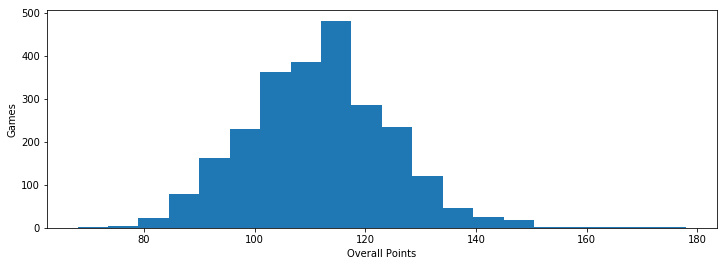

In [15]:
#Distrbution of Total PTS 
plt.figure(figsize=(12, 4))
plt.hist(df['PTS'],bins=20)
plt.xlabel('Overall Points')
plt.ylabel('Games')
plt.show()

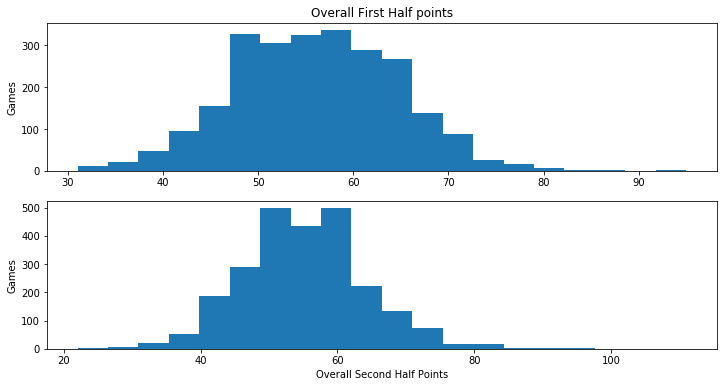

In [16]:
# Distrbution of First Half and Second Half
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.hist(df['PTS_FHALF'], bins= 20)
plt.title('Overall First Half points')
plt.ylabel('Games')

plt.subplot(2, 1, 2)
plt.hist(df['PTS_SHALF'], bins=20)
plt.xlabel('Overall Second Half Points')
plt.ylabel('Games')

plt.show()

## Part 4: Further Data Analysis
1) Find the Team Leading in First Half, winning rate <br>
2) Finding Correlation Among Quarter Points and Total Points <br>
3) Merge the BoxFourFactors and Find Correlation Among all set <br>


In [39]:
#Finding the Team Leading in First Half Winning Rate
df['LEAD_FH'] = 0
for i in range(0,len(df),2):
    if df['PTS_FHALF'].iloc[i] > df['PTS_FHALF'].iloc[i+1]: 
        df['LEAD_FH'].iloc[i] = 1
    elif df['PTS_FHALF'].iloc[i] < df['PTS_FHALF'].iloc[i+1]: 
        df['LEAD_FH'].iloc[i+1] = 1
    elif df['PTS_FHALF'].iloc[i] == df['PTS_FHALF'].iloc[i+1]:
        df['LEAD_FH'].iloc[i] = 2
        df['LEAD_FH'].iloc[i+1] =2 


In [40]:
# Finding Win Rate for Teams Leading in First Half
lead = len(df[(df.WIN ==1) & (df.LEAD_FH==1)])
print('Win Rate for Teams Leading in First Half:', lead/(len(df)/2))

Win Rate for Teams Leading in First Half: 0.7034930950446792


In [19]:
# Merging Two DataFrames together and Finding Correlation Among the Different Factors 
df_temp = df[['PTS_QTR1','PTS_QTR2','PTS_QTR3','PTS_QTR4','PTS']]
df_temp_factor = df_factor[['OPP_OREB_PCT','OPP_TOV_PCT','OPP_FTA_RATE','OPP_EFG_PCT','OREB_PCT','TM_TOV_PCT','FTA_RATE','EFG_PCT']]
df_combined = pd.concat([df_temp,df_temp_factor], axis=1)

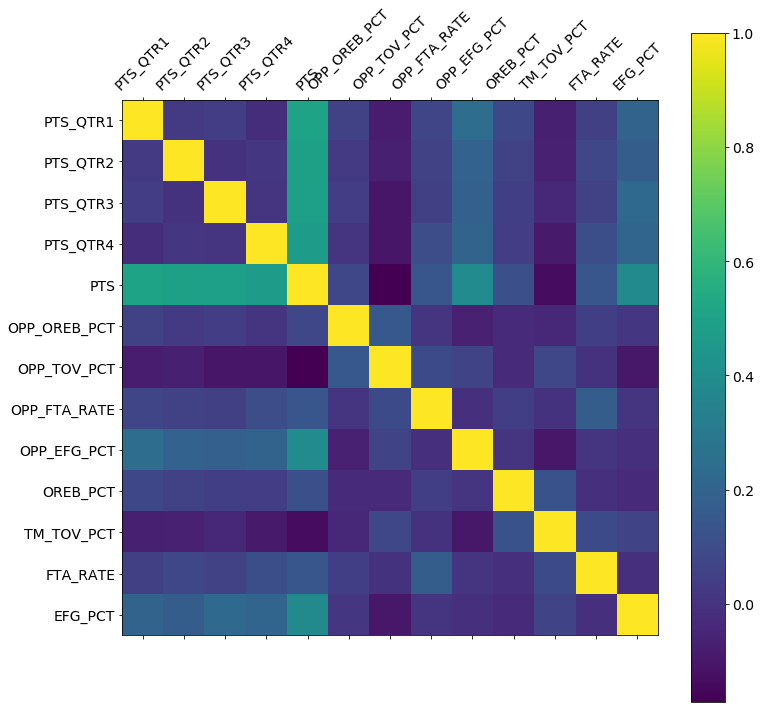

In [20]:
# Plotting Correlation Matrix
f = plt.figure(figsize=(12, 12))
plt.matshow(df_combined.corr(), fignum=f.number)
plt.xticks(range(df_combined.shape[1]), df_combined.columns, fontsize=14, rotation=45)
plt.yticks(range(df_combined.shape[1]), df_combined.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

**Can't Find any Significant Correlation among the Data**

#### Simple Logistic Regression to Predict Win based on Quater Points
1) Convert the WIN data to 0-1 data, 0-Won, 1- Not Won <br>
2) Build a Logistic Regression Model, to Predict the Win <br>
    * Train using QTR1 and QTR2 Points to predict the win <br>
    * Test how much correct prediction it got <br>
    * Add QTR3 Points and compare with above <br>
* To build a good Logistic Regression- More features are Required during the Game Play and to reduce the feature we can use Feature Elimination(RFE)
* As in current model, we are uing 3-4 features, we don't require feature elimination

In [ ]:
# First Logistic Regression using 3 Variables - PTS_QTR1, PTS_QTR2, PTR first Half
X = df[['PTS_QTR1','PTS_QTR2','PTS_FHALF']]
# For Output 'y' we need to convert it to 0-1
df = df.replace({'WIN':2},0)
y = df['WIN']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       362
           1       0.68      0.69      0.69       377

    accuracy                           0.68       739
   macro avg       0.68      0.68      0.68       739
weighted avg       0.68      0.68      0.68       739



In [55]:
X = df[['PTS_QTR1','PTS_QTR2','PTS_QTR3','PTS_FHALF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       362
           1       0.68      0.71      0.70       377

    accuracy                           0.69       739
   macro avg       0.69      0.69      0.69       739
weighted avg       0.69      0.69      0.69       739



#### Analysis of Logistic Regression
1) Increasing the parameter improved the results <br>
2) Just Quarter Points are not enough data for Good Quality Prediction of Final Results <br>


## Challenges and Future Work

**Challenges**<br>
1) Collecting Data From NBA.stats was most Challenging part of the Report-<br> 
    * To overcome Connection Request Error- I had to change my IP address multiple times 
2) Lot of redundacy in Data- In terms of Storage- we would need to reduce redundacy in data <br>

**Future Work**<br>
1) Based on NBA.stats 2017-2018 I can create a model for Win Probability for certain team <br>
2) More Data Collection to build Better Feature Set <br>
3) Reduce Data Redundacy 
